# Sentiment Analysis (CV-TF_IDF-HASH) 

### Import necessary libraries

In [1]:
# Dataframe
import pandas as pd

from collections import OrderedDict
import requests

# Array
import numpy as np
import itertools

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

### Reading and Cleaning the Dataset

In [2]:
# Read the file
df = pd.read_csv('1429_1.csv')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Sample observations
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [5]:
# Drop unnecessary columns
df2 = df[['reviews.rating','reviews.text']]

In [6]:
df2.head()

,reviews.rating,reviews.text
0,5.0,This product so far has not disappointed. My c...
1,5.0,great for beginner or experienced person. Boug...
2,5.0,Inexpensive tablet for him to use and learn on...
3,4.0,I've had my Fire HD 8 two weeks now and I love...
4,5.0,I bought this for my grand daughter when she c...


There is some missing values in both columns, the number is so small compared to the 34,000 examples in the dataset so we can remove them.

In [7]:
df2.dropna(inplace = True)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [8]:
df2.rename(columns = {'reviews.rating' : 'rating', 'reviews.text' : 'text'}, inplace = True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34626 entries, 0 to 34659
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rating  34626 non-null  float64
 1   text    34626 non-null  object 
dtypes: float64(1), object(1)
memory usage: 811.5+ KB


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Add new column indicating positive rating (>3) or negative rating (<=3)

In [9]:
df2['class'] = df2['rating'].apply(lambda x: 0 if x < 4 else 1)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [10]:
df2.head()

,rating,text,class
0,5.0,This product so far has not disappointed. My c...,1
1,5.0,great for beginner or experienced person. Boug...,1
2,5.0,Inexpensive tablet for him to use and learn on...,1
3,4.0,I've had my Fire HD 8 two weeks now and I love...,1
4,5.0,I bought this for my grand daughter when she c...,1


In [11]:
df2['class'].value_counts()

1    32315
0     2311
Name: class, dtype: int64

We will use only 1000 examples in Amazon Comprehend so I will take a random sample, 500 from each class.

In [12]:
neg = df2[df2['rating'] <= 2].sample(n = 500)
neg.head()

,rating,text,class
4961,2.0,I have one issue with this tablet. What headph...,0
5227,2.0,Bought this tablet for my daughter. It was ver...,0
29097,2.0,The portability is nice but misses key element...,0
34153,1.0,I purchased the Fire tv box and it just stoppe...,0
28644,1.0,"Purchased for my son's kindle fire , plug in ,...",0


In [13]:
pos = df2[df2['rating'] == 5].sample(n = 500)
pos.head()

,rating,text,class
912,5.0,I Bought this as a gift for my daughter! She i...,1
4454,5.0,Tablet work like charm and I never have issues...,1
8072,5.0,Never knew I needed a tablet until I got my ha...,1
5038,5.0,I bought this tablet as a gift for my mother-i...,1
17551,5.0,"I used to read with my ipad , but there was al...",1


In [14]:
df_final = pd.concat([neg, pos])
df_final.head()

,rating,text,class
4961,2.0,I have one issue with this tablet. What headph...,0
5227,2.0,Bought this tablet for my daughter. It was ver...,0
29097,2.0,The portability is nice but misses key element...,0
34153,1.0,I purchased the Fire tv box and it just stoppe...,0
28644,1.0,"Purchased for my son's kindle fire , plug in ,...",0


In [15]:
df_final.reset_index(inplace = True, drop = True)

In [16]:
df_final.shape

(1000, 3)

In [17]:
df_final['class'].value_counts()

1    500
0    500
Name: class, dtype: int64

In [18]:
df_final.head()

,rating,text,class
0,2.0,I have one issue with this tablet. What headph...,0
1,2.0,Bought this tablet for my daughter. It was ver...,0
2,2.0,The portability is nice but misses key element...,0
3,1.0,I purchased the Fire tv box and it just stoppe...,0
4,1.0,"Purchased for my son's kindle fire , plug in ,...",0


Now our data is ready to be sent to Amazon Comprehend.

### Sentiment Analysis

In [19]:
# Connect to Amazon Comrehend
import boto3 
comprehend = boto3.client('comprehend', region_name='us-east-1')

In [20]:
result = []
for i in range(0,1000):
    response = comprehend.detect_sentiment(Text = df_final['text'].loc[i], LanguageCode = 'en')
    result.append(response.get('Sentiment'))

In [21]:
print(len(result))

1000


In [22]:
df_final['result'] = result

In [23]:
df_final['result'].value_counts()

POSITIVE    498
NEGATIVE    367
MIXED       124
NEUTRAL      11
Name: result, dtype: int64

In [24]:
df_final.head()

,rating,text,class,result
0,2.0,I have one issue with this tablet. What headph...,0,NEGATIVE
1,2.0,Bought this tablet for my daughter. It was ver...,0,NEGATIVE
2,2.0,The portability is nice but misses key element...,0,MIXED
3,1.0,I purchased the Fire tv box and it just stoppe...,0,NEGATIVE
4,1.0,"Purchased for my son's kindle fire , plug in ,...",0,NEGATIVE


In [25]:
df_final['result'][df_final['class'] == 1].value_counts()

POSITIVE    469
MIXED        21
NEGATIVE      8
NEUTRAL       2
Name: result, dtype: int64

In [26]:
df_final['result'][df_final['class'] == 0].value_counts()

NEGATIVE    359
MIXED       103
POSITIVE     29
NEUTRAL       9
Name: result, dtype: int64

The result of the analysis is shown above, most of the positive reviews were classified correctly (481 out of 500) and almost 70% of the negative reviews were classified correctly, ignoring the existence of 2 classes we are not using (MIXED and NEUTRAL).<br>
In my opinion, if those 2 classes weren't there and the result from comprehend was only positive or negative the accuracy would have been even better.

Now, I will consider the reviews classified as neutral or mixed to be true and make the result column 1s and os to plot the confusion matrix.

In [27]:
df_final['Predictions'] = pd.concat([df_final['result'][df_final['class'] == 0].apply(lambda x: 1 if x == 'POSITIVE' else 0),
                                     df_final['result'][df_final['class'] == 1].apply(lambda x: 0 if x == 'NEGATIVE' else 1)])

In [28]:
df_final['Predictions'].value_counts()

1    521
0    479
Name: Predictions, dtype: int64

In [29]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.ocean):
    """
    Create a confusion matrix plot for 'good' and 'bad' rating values 
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize = 20)
    plt.yticks(tick_marks, classes, fontsize = 20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = "center", 
                 color = "white" if cm[i, j] < thresh else "black", fontsize = 40)
    
    plt.tight_layout()
    plt.ylabel('True Label', fontsize = 30)
    plt.xlabel('Predicted Label', fontsize = 30)

    return plt

In [30]:
def disp_confusion_matrix(y_pred, model_name, vector = 'CounterVectorizing'):
    """
    Display confusion matrix for selected model with countVectorizer
    """
    cm = confusion_matrix(df_final['class'], y_pred)
    fig = plt.figure(figsize=(10, 10))
    plot = plot_confusion_matrix(cm, classes=['Bad','Good'], normalize=False, 
                                 title = model_name + " " + 'with' + " " + vector + " "+ '\nConfusion Matrix')
    plt.show()

In [31]:
# Compute and print the classification report
print(classification_report(df_final['class'], df_final['Predictions']))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       500
           1       0.94      0.98      0.96       500

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



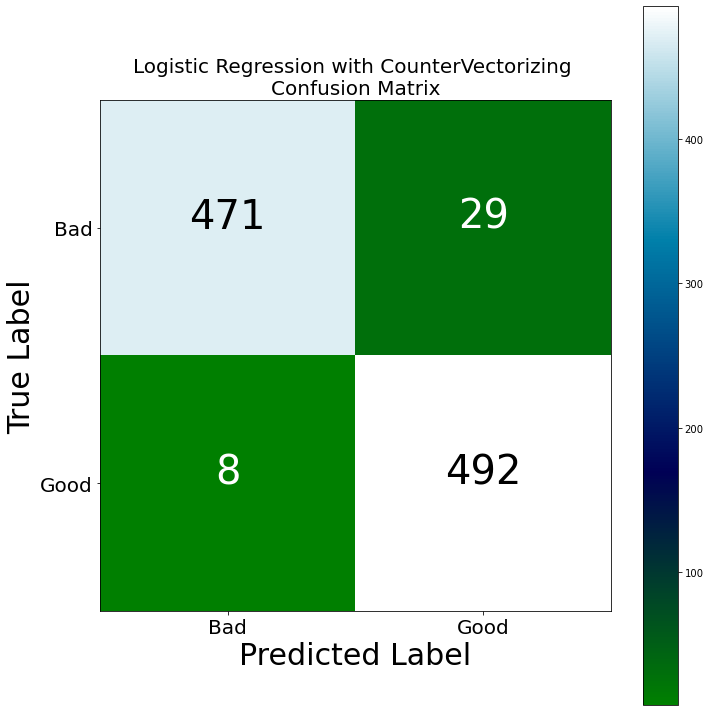

In [32]:
# Print confusion matrix for logistic regression with countvectorizer
disp_confusion_matrix(df_final['Predictions'], "Logistic Regression")